In [17]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np

def graficar_barras_con_imagen(porcentajes, etiquetas, modelos, titulo,archivo, ruta_imagen):
    # Ajustamos el tamaño un poco más alto para dar margen superior real
    fig, ax = plt.subplots(figsize=(14, 8))
    
    colores = plt.cm.viridis(np.linspace(0, 1, len(etiquetas))) 
    
    barras = ax.bar(etiquetas, porcentajes, color=colores, edgecolor='grey')
    
    max_valor = max(porcentajes)
    max_indice = porcentajes.index(max_valor)

    for i, barra in enumerate(barras):
        altura = barra.get_height()
        nombre_modelo = modelos[i]

        if len(nombre_modelo) > 30:
            nombre_modelo = nombre_modelo[:10] + "..."

        texto_completo = f"{nombre_modelo} - {porcentajes[i]:.3f}"
        
        # --- TEXTO ---
        ax.text(
            barra.get_x() + barra.get_width() / 2, 
            altura + 0.01, # Un pelín arriba de la barra
            texto_completo, 
            ha='center', 
            va='bottom',
            rotation=75,       
            fontsize=9,        
            fontweight='bold',
            # IMPORTANTE: clip_on=False permite que el texto se dibuje 
            # aunque se salga del techo del gráfico (y=1)
            clip_on=False 
        )

        # --- IMAGEN ---
        if etiquetas[i] == 'Binary Lions':
            try:
                arr_img = plt.imread(ruta_imagen)
                imagebox = OffsetImage(arr_img, zoom=0.025) 
                
                ab = AnnotationBbox(
                    imagebox, 
                    (i, altura),
                    # Subimos 130 puntos. Como el eje acaba en 1, esto flotará fuera del gráfico
                    xybox=(0, 120), 
                    xycoords='data',
                    boxcoords="offset points",
                    frameon=False,
                    box_alignment=(0.5, 0),
                    # IMPORTANTE: clip_on=False evita que la imagen desaparezca al cruzar y=1
                    clip_on=False 
                )
                ax.add_artist(ab)
            except FileNotFoundError:
                pass 

    # --- EJE Y LIMITE 1 ---
    ax.set_ylim(0, 1)
    ax.set_ylabel('Accuracy / Score')

    # --- TITULO ---
    # pad=90: Empujamos el título MUY arriba porque ahora el texto y la imagen
    # están viviendo en el espacio vacío entre el eje y el título.
    ax.set_title(titulo, fontsize=16, fontweight='bold', pad=100)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.xticks(rotation=45, ha='right', fontsize=9)

    plt.tight_layout() 
    plt.savefig(archivo)
    plt.show()


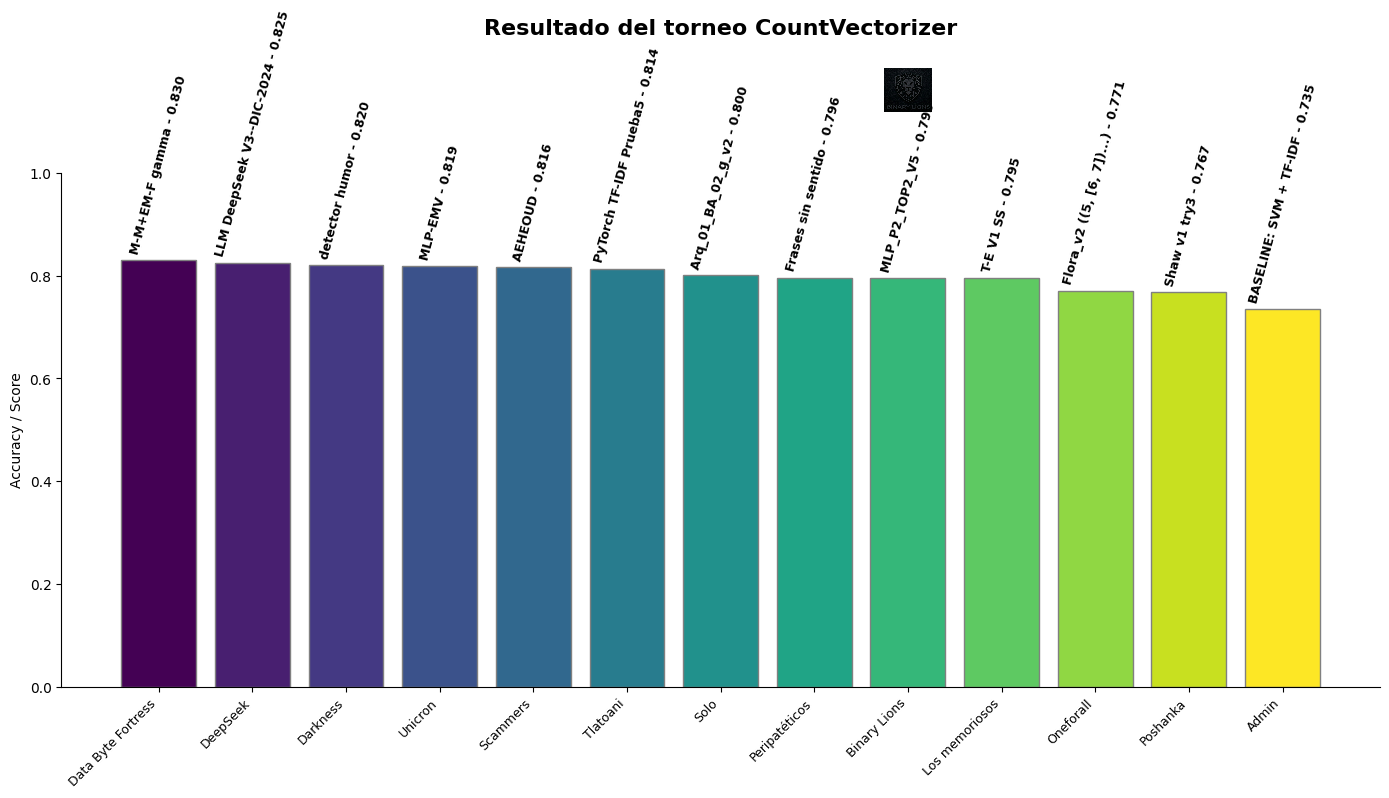

In [18]:

# --- DATOS ---
mis_datos = [0.8295, 0.8246, 0.8199, 0.8189, 0.8162, 0.8138,0.8005,0.7958,0.7951,0.7948, 0.7711, 0.7675, 0.735]
mis_etiquetas = ['Data Byte Fortress', 'DeepSeek', 'Darkness', 'Unicron', 'Scammers', 'Tlatoani', 'Solo', 'Peripatéticos', 'Binary Lions', 'Los memoriosos', 'Oneforall', 'Poshanka', 'Admin']
modelos = ['M-M+EM-F gamma', 'LLM DeepSeek V3--DIC-2024','detector humor', 'MLP-EMV', 'AEHEOUD', 'PyTorch TF-IDF Prueba5', 'Arq_01_BA_02_g_v2', 'Frases sin sentido','MLP_P2_TOP2_V5', 'T-E V1 SS', 'Flora_v2 ((5, [6, 7])...)', 'Shaw v1 try3', 'BASELINE: SVM + TF-IDF']

# CORRECCIÓN EN LA LLAMADA: Ahora pasamos los 4 argumentos (incluyendo 'modelos')
graficar_barras_con_imagen(mis_datos, mis_etiquetas, modelos, 'Resultado del torneo CountVectorizer','mlp.pdf', 'logo.png')

In [24]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np

# 1. Función modificada para recibir un DICCIONARIO
def graficar_diccionario(datos_dict, titulo, archivo, ruta_imagen):
    """
    datos_dict espera este formato:
    {
        'Nombre Equipo': {'score': 0.85, 'modelo': 'Descripcion del modelo'},
        ...
    }
    """
    
    # --- PASO 1: ORDENAR DATOS ---
    # Convertimos el diccionario a una lista de items y ordenamos por 'score' descendente
    # x[0] es la clave (Equipo), x[1] es el valor ({score, modelo})
    datos_ordenados = sorted(datos_dict.items(), key=lambda x: x[1]['score'], reverse=True)
    
    # Desempaquetamos en las listas que necesita matplotlib
    etiquetas = [item[0] for item in datos_ordenados]
    porcentajes = [item[1]['score'] for item in datos_ordenados]
    modelos = [item[1]['modelo'] for item in datos_ordenados]

    # --- PASO 2: GRAFICAR (Tu lógica original intacta) ---
    fig, ax = plt.subplots(figsize=(14, 8))
    colores = plt.cm.viridis(np.linspace(0, 1, len(etiquetas))) 
    
    barras = ax.bar(etiquetas, porcentajes, color=colores, edgecolor='grey')

    for i, barra in enumerate(barras):
        altura = barra.get_height()
        nombre_modelo = modelos[i]

        # Recortar nombre si es muy largo
        if len(nombre_modelo) > 10:
            nombre_modelo = nombre_modelo[:10] + "..." # Ajusté un poco el recorte

        texto_completo = f"{nombre_modelo} - {porcentajes[i]:.3f}"
        
        # --- TEXTO ---
        ax.text(
            barra.get_x() + barra.get_width() / 2, 
            altura + 0.01,
            texto_completo, 
            ha='center', va='bottom', rotation=75, fontsize=9, fontweight='bold',
            clip_on=False 
        )

        # --- IMAGEN (Binary Lions) ---
        if etiquetas[i] == 'Binary Lions':
            try:
                arr_img = plt.imread(ruta_imagen)
                imagebox = OffsetImage(arr_img, zoom=0.03) 
                ab = AnnotationBbox(
                    imagebox, (i, altura),
                    xybox=(0, 120), xycoords='data', boxcoords="offset points",
                    frameon=False, box_alignment=(0.5, 0), clip_on=False 
                )
                ax.add_artist(ab)
            except FileNotFoundError:
                print(f"Advertencia: No se encontró la imagen en {ruta_imagen}")
                pass 

    # --- ESTILO FINAL ---
    ax.set_ylim(0, 1)
    ax.set_ylabel('Accuracy / Score')
    ax.set_title(titulo, fontsize=16, fontweight='bold', pad=100)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.tight_layout() 
    plt.savefig(archivo)
    plt.show()


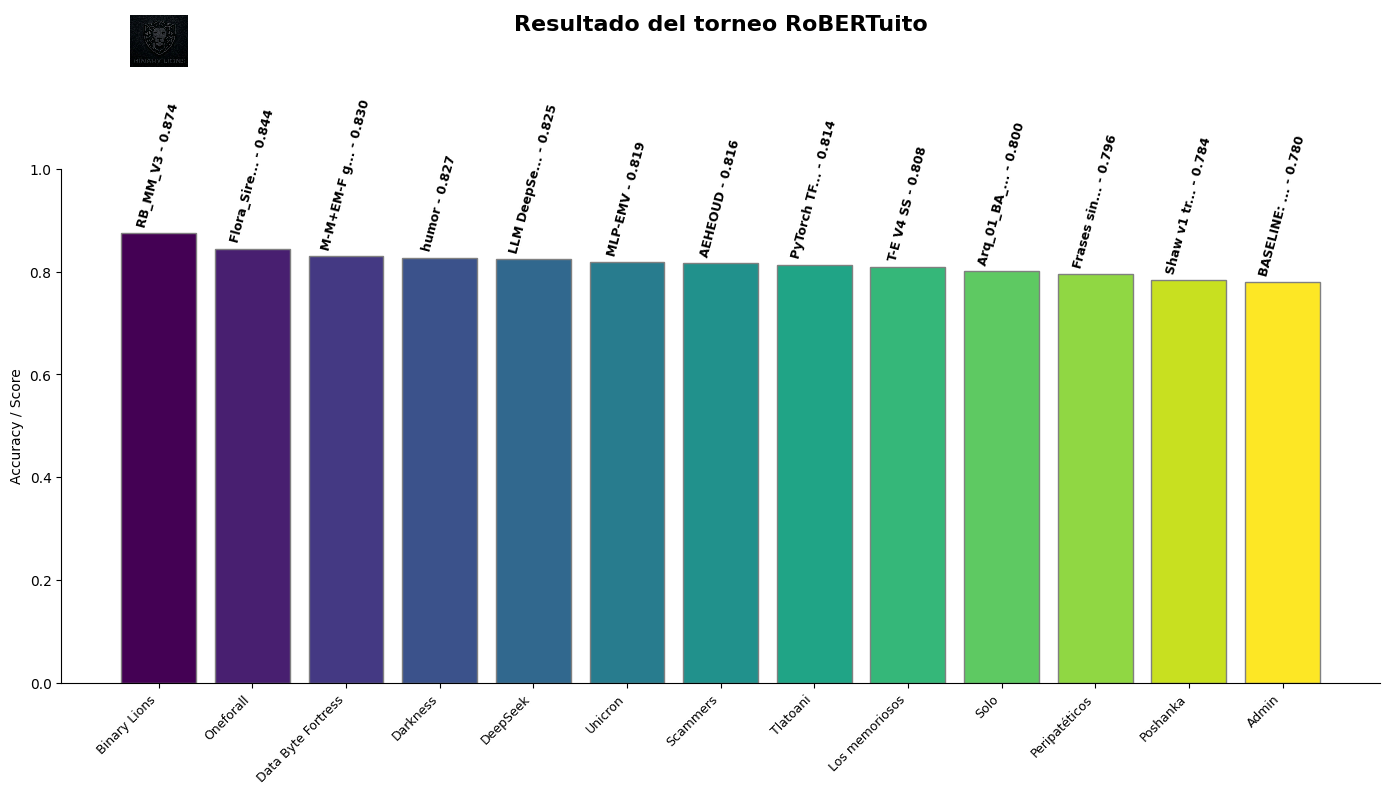

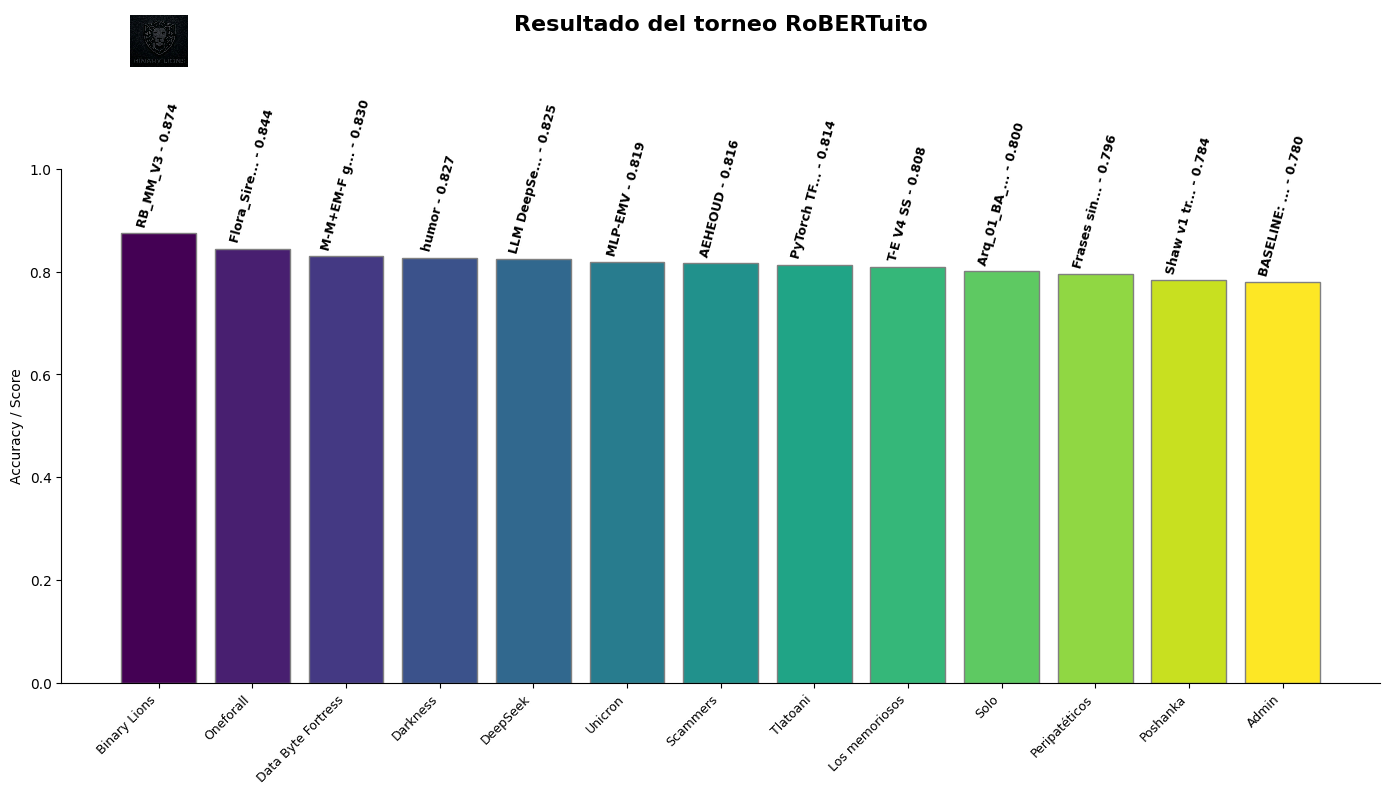

In [25]:

# --- DATOS DE ENTRADA (Formato Diccionario) ---
# Es mucho más fácil de leer y editar:
mis_datos_dict = {
    'Binary Lions':       {'score': 0.8744, 'modelo': 'RB_MM_V3'},
    'Oneforall':          {'score': 0.8444, 'modelo': 'Flora_Sirenix_v41 ((5,[6,7]), (21,69,261),5, 21, 105, 7)'},
    'Data Byte Fortress': {'score': 0.8295, 'modelo': 'M-M+EM-F gamma'},
    'Darkness':           {'score': 0.827, 'modelo': 'humor'},
    'DeepSeek':           {'score': 0.8246, 'modelo': 'LLM DeepSeek V3--DIC-2024'},
    'Unicron':            {'score': 0.8189, 'modelo': 'MLP-EMV'},
    'Scammers':           {'score': 0.8162, 'modelo': 'AEHEOUD'},
    'Tlatoani':           {'score': 0.8138, 'modelo': 'PyTorch TF-IDF Prueba5'},
    'Los memoriosos':     {'score': 0.8083, 'modelo': 'T-E V4 SS'},
    'Solo':               {'score': 0.8005, 'modelo': 'Arq_01_BA_02_g_v2'},
    'Peripatéticos':      {'score': 0.7958, 'modelo': 'Frases sin sentido'},
    'Poshanka':           {'score': 0.7838, 'modelo': 'Shaw v1 try3'},
    'Admin':              {'score': 0.7796, 'modelo': 'BASELINE: SVM + TF-IDF'}
}

# --- EJECUCIÓN ---
graficar_diccionario(
    mis_datos_dict, 
    'Resultado del torneo RoBERTuito', 
    'robertuito.pdf', 
    'logo.png'
)

graficar_diccionario(
    mis_datos_dict, 
    'Resultado del torneo RoBERTuito', 
    'robertuito.png', 
    'logo.png'
)

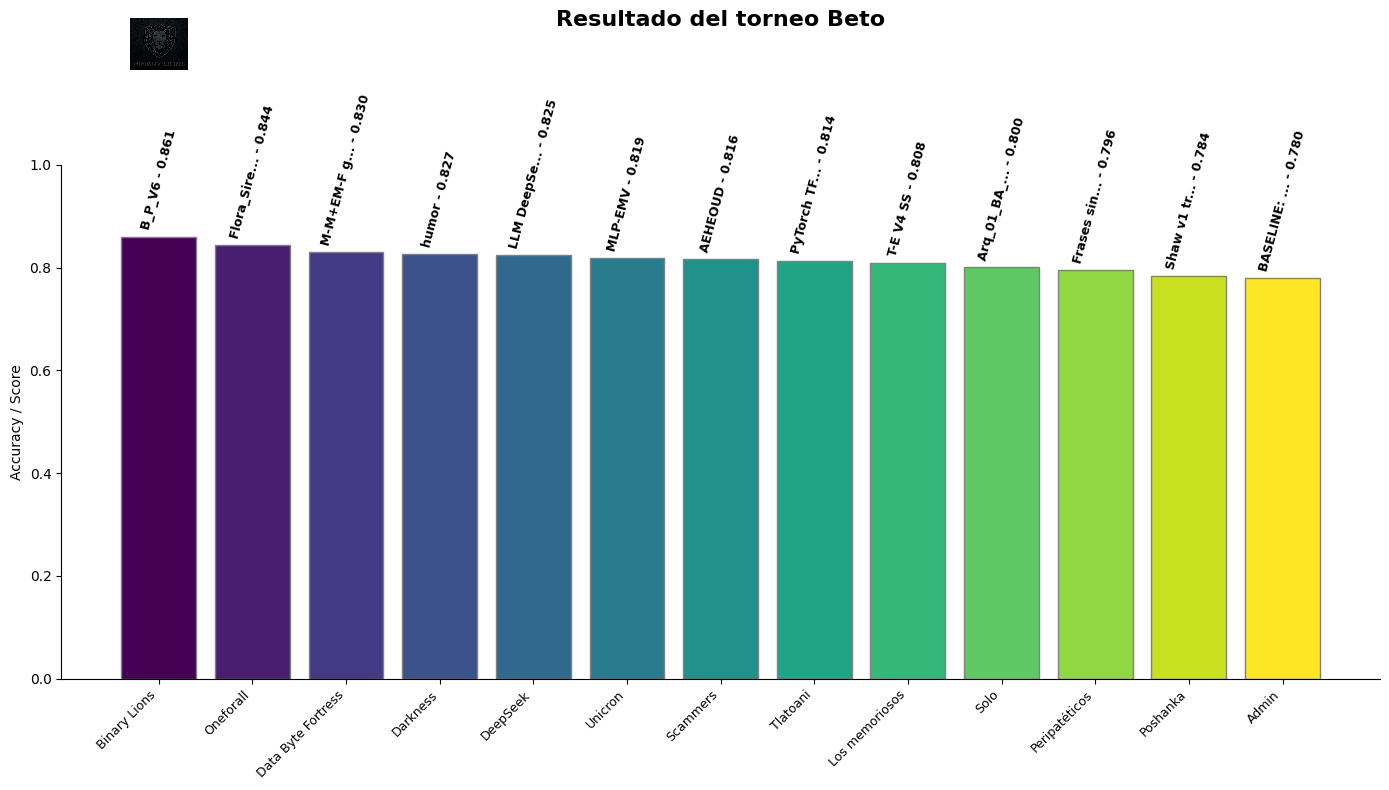

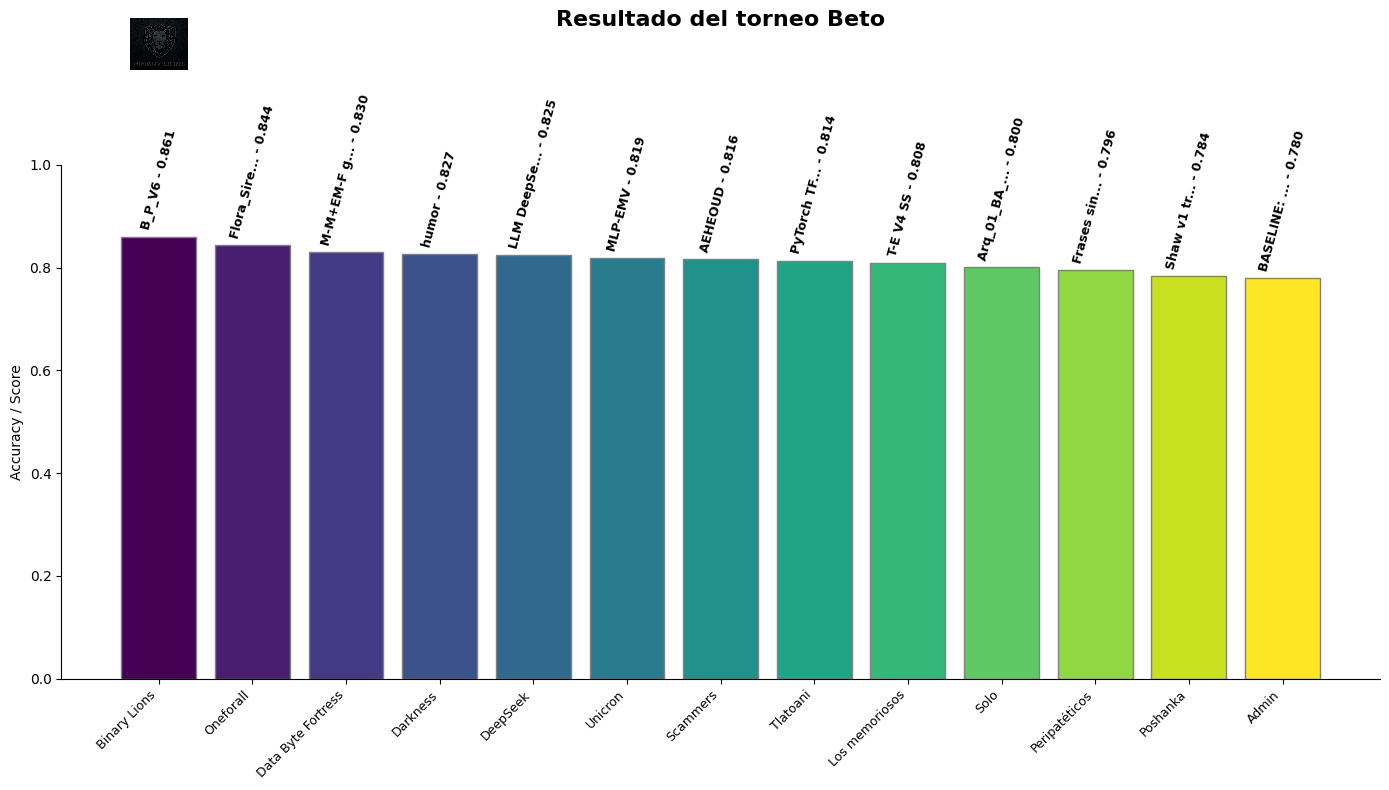

In [26]:
# --- DATOS DE ENTRADA (Formato Diccionario) ---
# Es mucho más fácil de leer y editar:
mis_datos_dict = {
    'Binary Lions':       {'score': 0.8605, 'modelo': 'B_P_V6'},
    'Oneforall':          {'score': 0.8444, 'modelo': 'Flora_Sirenix_v41 ((5,[6,7]), (21,69,261),5, 21, 105, 7)'},
    'Data Byte Fortress': {'score': 0.8295, 'modelo': 'M-M+EM-F gamma'},
    'Darkness':           {'score': 0.827, 'modelo': 'humor'},
    'DeepSeek':           {'score': 0.8246, 'modelo': 'LLM DeepSeek V3--DIC-2024'},
    'Unicron':            {'score': 0.8189, 'modelo': 'MLP-EMV'},
    'Scammers':           {'score': 0.8162, 'modelo': 'AEHEOUD'},
    'Tlatoani':           {'score': 0.8138, 'modelo': 'PyTorch TF-IDF Prueba5'},
    'Los memoriosos':     {'score': 0.8083, 'modelo': 'T-E V4 SS'},
    'Solo':               {'score': 0.8005, 'modelo': 'Arq_01_BA_02_g_v2'},
    'Peripatéticos':      {'score': 0.7958, 'modelo': 'Frases sin sentido'},
    'Poshanka':           {'score': 0.7838, 'modelo': 'Shaw v1 try3'},
    'Admin':              {'score': 0.7796, 'modelo': 'BASELINE: SVM + TF-IDF'}
}

# --- EJECUCIÓN ---
graficar_diccionario(
    mis_datos_dict, 
    'Resultado del torneo Beto', 
    'beto.pdf', 
    'logo.png'
)

graficar_diccionario(
    mis_datos_dict, 
    'Resultado del torneo Beto', 
    'beto.png', 
    'logo.png'
)

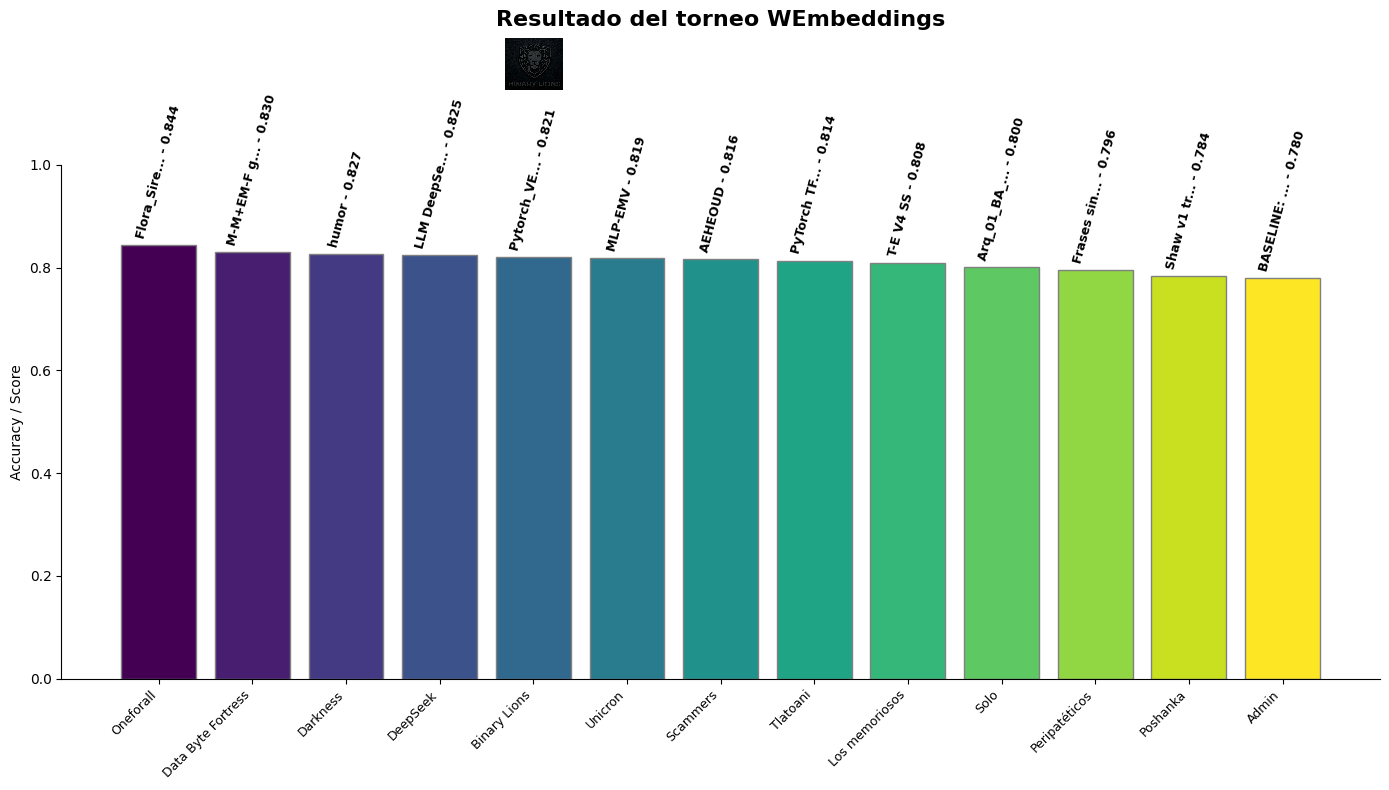

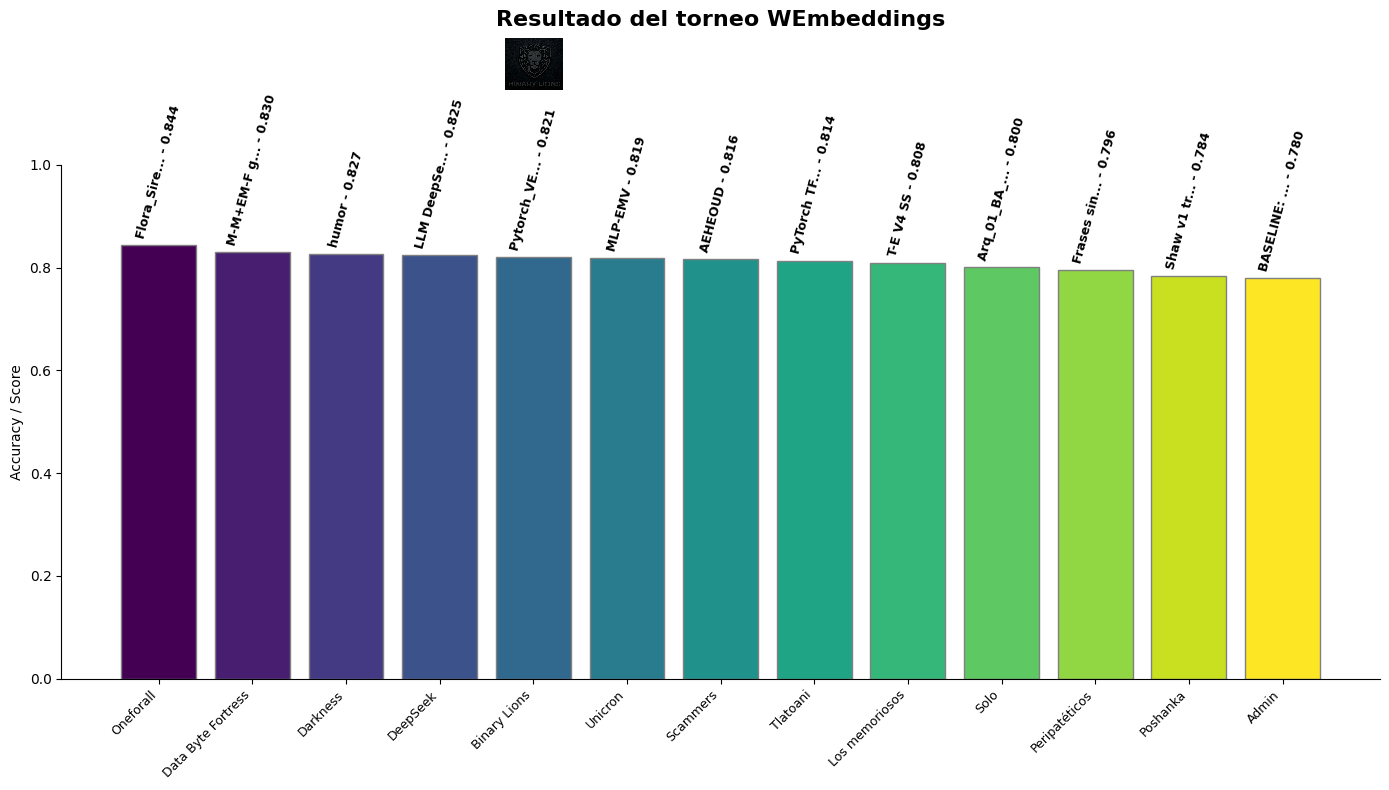

In [27]:
# --- DATOS DE ENTRADA (Formato Diccionario) ---
# Es mucho más fácil de leer y editar:
mis_datos_dict = {
    'Oneforall':          {'score': 0.8444, 'modelo': 'Flora_Sirenix_v41 ((5,[6,7]), (21,69,261),5, 21, 105, 7)'},
    'Data Byte Fortress': {'score': 0.8295, 'modelo': 'M-M+EM-F gamma'},
    'Darkness':           {'score': 0.827, 'modelo': 'humor'},
    'DeepSeek':           {'score': 0.8246, 'modelo': 'LLM DeepSeek V3--DIC-2024'},
    'Binary Lions':       {'score': 0.8206, 'modelo': 'Pytorch_VEX_P2'},
    'Unicron':            {'score': 0.8189, 'modelo': 'MLP-EMV'},
    'Scammers':           {'score': 0.8162, 'modelo': 'AEHEOUD'},
    'Tlatoani':           {'score': 0.8138, 'modelo': 'PyTorch TF-IDF Prueba5'},
    'Los memoriosos':     {'score': 0.8083, 'modelo': 'T-E V4 SS'},
    'Solo':               {'score': 0.8005, 'modelo': 'Arq_01_BA_02_g_v2'},
    'Peripatéticos':      {'score': 0.7958, 'modelo': 'Frases sin sentido'},
    'Poshanka':           {'score': 0.7838, 'modelo': 'Shaw v1 try3'},
    'Admin':              {'score': 0.7796, 'modelo': 'BASELINE: SVM + TF-IDF'}
}

# --- EJECUCIÓN ---
graficar_diccionario(
    mis_datos_dict, 
    'Resultado del torneo WEmbeddings', 
    'torch.pdf', 
    'logo.png'
)

graficar_diccionario(
    mis_datos_dict, 
    'Resultado del torneo WEmbeddings', 
    'torch.png', 
    'logo.png'
)

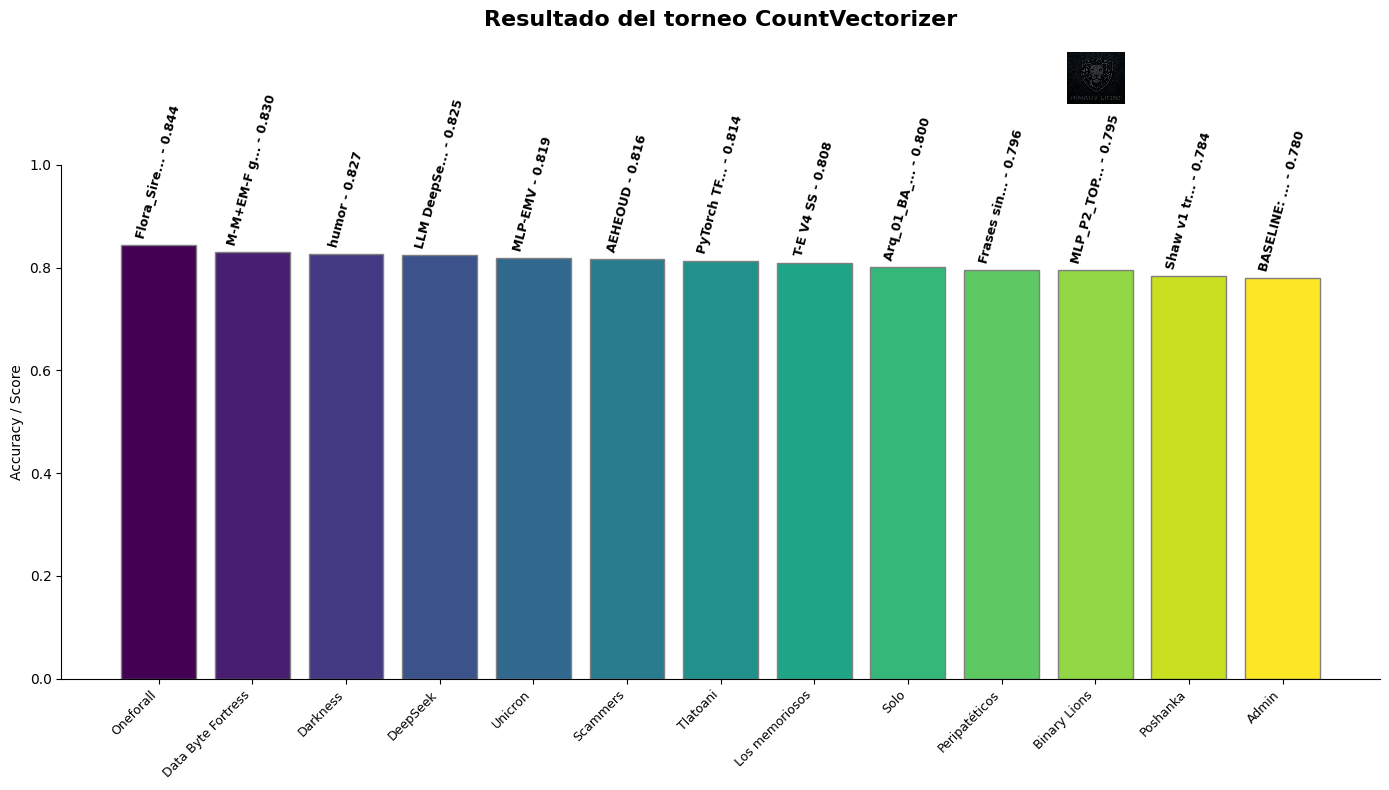

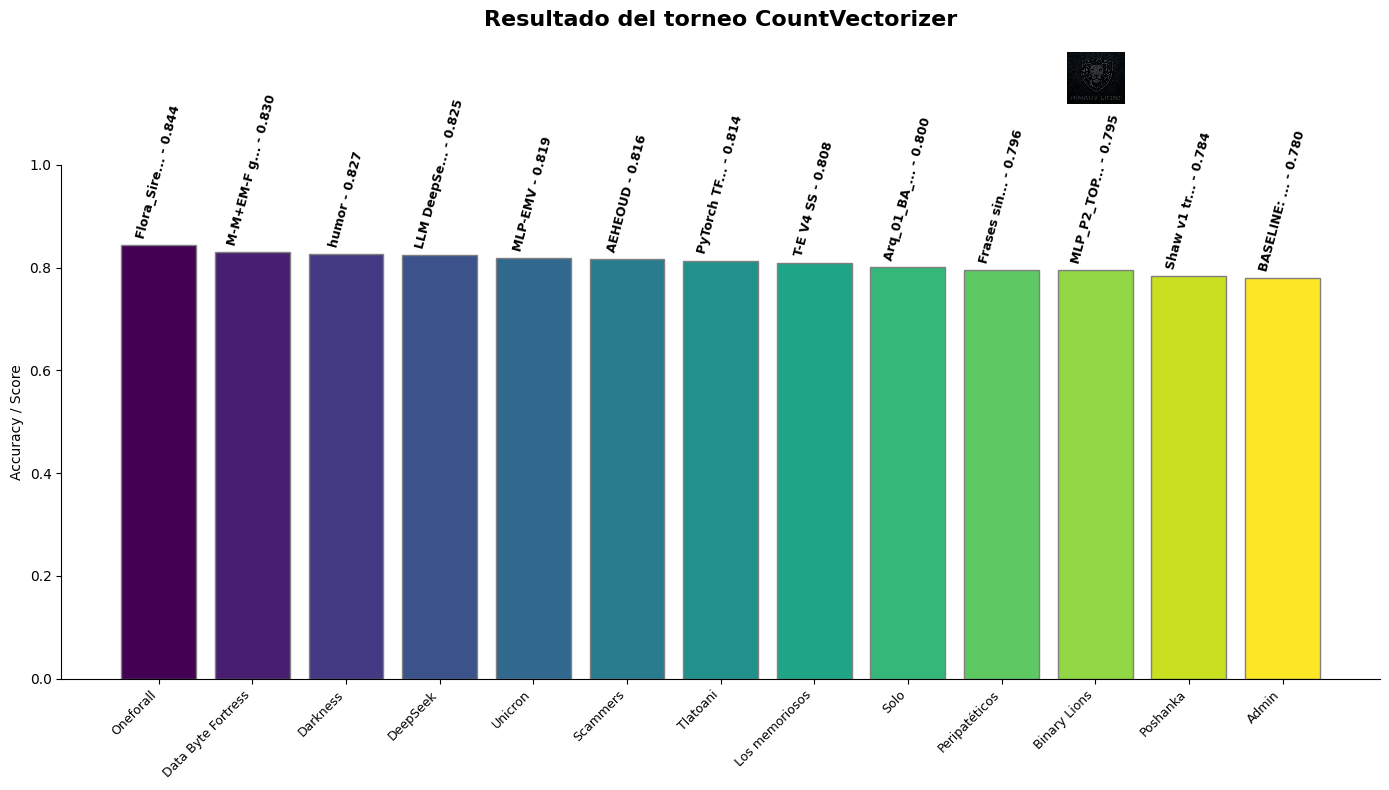

In [28]:
# --- DATOS DE ENTRADA (Formato Diccionario) ---
# Es mucho más fácil de leer y editar:
mis_datos_dict = {
    'Oneforall':          {'score': 0.8444, 'modelo': 'Flora_Sirenix_v41 ((5,[6,7]), (21,69,261),5, 21, 105, 7)'},
    'Data Byte Fortress': {'score': 0.8295, 'modelo': 'M-M+EM-F gamma'},
    'Darkness':           {'score': 0.827, 'modelo': 'humor'},
    'DeepSeek':           {'score': 0.8246, 'modelo': 'LLM DeepSeek V3--DIC-2024'},
    'Unicron':            {'score': 0.8189, 'modelo': 'MLP-EMV'},
    'Scammers':           {'score': 0.8162, 'modelo': 'AEHEOUD'},
    'Tlatoani':           {'score': 0.8138, 'modelo': 'PyTorch TF-IDF Prueba5'},
    'Los memoriosos':     {'score': 0.8083, 'modelo': 'T-E V4 SS'},
    'Solo':               {'score': 0.8005, 'modelo': 'Arq_01_BA_02_g_v2'},
    'Peripatéticos':      {'score': 0.7958, 'modelo': 'Frases sin sentido'},
    'Binary Lions':       {'score': 0.7951, 'modelo': 'MLP_P2_TOP2_V5'},
    'Poshanka':           {'score': 0.7838, 'modelo': 'Shaw v1 try3'},
    'Admin':              {'score': 0.7796, 'modelo': 'BASELINE: SVM + TF-IDF'}
}

# --- EJECUCIÓN ---
graficar_diccionario(
    mis_datos_dict, 
    'Resultado del torneo CountVectorizer', 
    'mlp.pdf', 
    'logo.png'
)

graficar_diccionario(
    mis_datos_dict, 
    'Resultado del torneo CountVectorizer', 
    'mlp.png', 
    'logo.png'
)